<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/ai/ai-uis-student/raw/master/imgs/banner_IA.png"  width="1000px" height="200px">

# **Taller 7: Aprendizaje no supervisado**

## **Outline**

1. [Ejercicio 1.](#eje1)
2. [Ejercicio 2.](#eje2)
3. [Ejercicio 3.](#eje3)

In [23]:
#@title **Execute this cell**
#@markdown Please include your student id
import sys
import inspect

group_id = "IA1-20252-G1" #@param {type:"string"}
assignment_id = group_id +'.taller_unsupervised'
student_id = "2204002" #@param {type:"string"}
"""
Put your student ID here

Example: student_id =  '2152145'
"""

"\nPut your student ID here\n\nExample: student_id =  '2152145'\n"

In [24]:
 #@title **Execute this cell**
#@markdown **UTILS**
#@markdown Please dont modify any line in this cell

import os
import json
import requests
from collections import namedtuple


Config = namedtuple('Config', ['server_name'])
config = Config(server_name='https://bivlabgrader.azurewebsites.net/api')


def check_solution_and_evaluate(assignment_id: str, student_func_str: str):

    # Set the endpoint and payload.
    payload = {
        'func_str': student_func_str,
        'assignment_id': assignment_id,
        'student_id': student_id
    }
    endpoint_url = config.server_name + '/CheckAndEvaluateSolution'
    # print(endpoint_url)

    # Make request to server with the data coming from the notebook.
    r = requests.post(endpoint_url, params=payload)
    pprint_json_response(r.json())
    return r


def pprint_json_response(response, indent=0):
    """Pretty print the response."""
    for key, value in response.items():
        print('\t' * indent + str(key.capitalize()))

        # If dictionary, do a recurrent call.
        if isinstance(value, dict):
            pprint_json_response(value, indent + 1)
        else:
            # Enumerate elements if list.
            if isinstance(value, list):
                if len(value) == 1:
                    print('\t' * (indent + 1) + str(value[0]))
                else:
                    for i, e in enumerate(value, start=1):
                        print('\t' * (indent + 1) + f'{i}. {e}')
            else:
                print('\t' * (indent + 1) + str(value))

In [25]:
#@title **Import libraries**
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
np.random.seed(21)

---
# **Ejercicio 1**  <a name="eje1"></a>
---

Utilizando el dataset **Fertilizer**, realiza un análisis de clústeres para identificar patrones en las características relacionadas con fertilizantes y su composición. Desarrolle una función que:

- Elimine las columnas `['Soil Type', 'Crop Type', 'Fertilizer Name']`

- Escale los datos usando la técnica de **StandardScaler** para normalizar las características.

- Implemente un estimador **K-Means** con un número fijo de clústeres (`n_clusters=3`) y parámetros `random_state=21`.

- Para una mayor facilidad en los siguientes pasos, cree una <ins>nueva</ins> columna `'Cluster'` en el dataset ya escalado, y asígnele las predicciones del estimador **K-Means** (`clusters`).

- **Devuelva** el <ins>promedio</ins> de las características numéricas para cada clúster.
- **Devuelva** la cantidad de puntos asignados a cada clúster.

- Aplica la técnica de **t-SNE** para reducir las dimensiones del espacio de características a 2 dimensiones, con parámetros `perplexity=30, learning_rate=200, random_state=21`.
- **Devuelva** cada una de las componentes obtenidas mediante **t-SNE**, en <ins>variables separadas</ins>.
- **Devuelva** las predicciones del estimador **K-Means**.


In [19]:
#@title **code student**

def function_t07_1_img_seg_20242(data):
  import pandas as pd
  import numpy as np
  from sklearn.cluster import KMeans
  from sklearn.preprocessing import StandardScaler
  from sklearn.manifold import TSNE

  data = data.drop(['Soil Type', 'Crop Type', 'Fertilizer Name'], axis=1)
  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(data)
  kmeans = KMeans(n_clusters=3, random_state=21)
  clusters = kmeans.fit_predict(scaled_data)
  data['Cluster'] = clusters
  tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=21)
  tsne_results = tsne.fit_transform(scaled_data)
  cluster_summary = data.groupby('Cluster')[data.columns].mean()
  cluster_counts = data['Cluster'].value_counts()

  return cluster_summary, cluster_counts, tsne_results[:,0], tsne_results[:,1], clusters

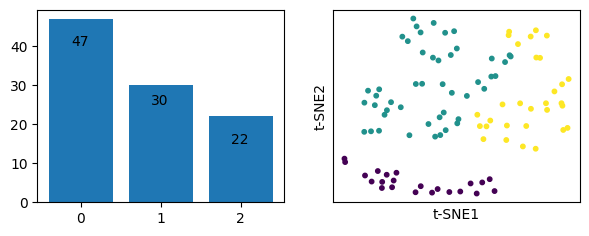

In [20]:
#@title **check your answer**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://drive.google.com/uc?id=1WK_Xv1Aao_PBEktsqjDcdCLcBxO_rPcy")
mysummary, mycounts, tsne1, tsne2, clusters = function_t07_1_img_seg_20242(df)

plt.figure(figsize=(7,2.5))
plt.subplot(1,2,1)
plt.bar(np.arange(mycounts.shape[0]), mycounts)
plt.text(-0.12, 40, mycounts[1])
plt.text(0.88, 25, mycounts[2])
plt.text(1.88, 15, mycounts[0])
plt.subplot(1,2,2)
plt.scatter(tsne1, tsne2, c=clusters, s=10)
plt.xticks([])
plt.yticks([])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.show()

In [26]:
#@title **send your answer**
student_func_str = inspect.getsource(function_t07_1_img_seg_20242)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5
Message
	Well done. You got the highest score.
Status
	You have achieved your best score: 5


---
# **Ejercicio 2**  <a name="eje2"></a>
---

Utilizando el dataset **food**, realiza un análisis de clústeres para identificar patrones en las características relacionadas con alimentos y su composición nutricional. Desarrolle una función que:

- Elimine las columnas `['Category', 'Description', 'Nutrient Data Bank Number']`

- Normalice las características utilizando **StandardScaler**.

- Aplique la técnica **PCA** para reducir las dimensiones a 2 componentes principales, con parámetros `random_state=21`.

- Implemente un estimador **K-Means** con 4 clústeres con parámetros `random_state=21`, y aplíquelo a las 2 componentes principales obtenidas (imagine que su nuevo dataset corresponde a esas 2 componentes).

- **Devuelva** las componentes obtenidas mediante **PCA**, en <ins>variables separadas</ins>.

- **Devuelva** las predicciones del estimador **K-Means** (`kmeans_clusters`).

- **Devuelva** los centroides obtenidos mediante el estimador **K-Means**.

In [ ]:
def function_t07_2_img_seg_20242(data):
    import pandas as pd
    import numpy as np
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    from sklearn.preprocessing import StandardScaler

    # 1. Elimina las columnas especificadas
    data = data.drop(['Category', 'Description', 'Nutrient Data Bank Number'], axis=1)

    # 2. Normaliza las características
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(data)

    # 3. Reduce dimensionalidad con PCA (2 componentes)
    pca = PCA(n_components=2, random_state=21)
    pca_features = pca.fit_transform(normalized_features)

    # 4. K-Means sobre las componentes principales (4 clusters)
    kmeans = KMeans(n_clusters=4, random_state=21)
    kmeans_clusters = kmeans.fit_predict(pca_features)
    centroids = kmeans.cluster_centers_

    # 5. Devuelve componentes PCA separadas, predicciones y centroides
    return (
        pca_features[:, 0],         # Componente principal 1
        pca_features[:, 1],         # Componente principal 2
        kmeans_clusters,            # Predicciones K-Means
        centroids                   # Centroides K-Means
    )

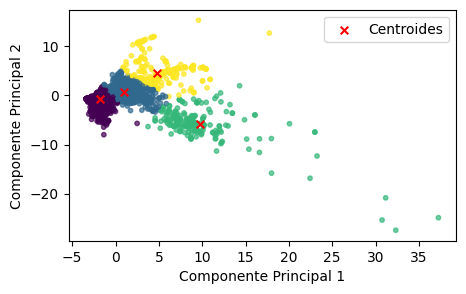

In [ ]:
#@title **check your answer**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://drive.google.com/uc?id=1W134uhbKua0JQC_m3Fn6gSuzkEck9p6e")

pca1, pca2, km, cs = function_t07_2_img_seg_20242(df)

plt.figure(figsize=(5,3))
plt.scatter(pca1, pca2, c=km, cmap='viridis', alpha=0.7, s=10)
plt.scatter(cs[:,0], cs[:,1], c='red', marker='x', s=30, label='Centroides')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()

In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(function_t07_2_img_seg_20242)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5
Message
	Well done. You got the highest score.


---
# **Ejercicio 3**  <a name="eje3"></a>
---

Utilice el dataset **palmerpenguins_extended** para realizar un análisis a las columnas numéricas del dataset. Desarrolle una función que:

- Elimine las columnas `['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics']`

- Normalice las características utilizando **StandardScaler**.<br><br>

- Reduzca las dimensiones del espacio de características a 2 dimensiones mediante la técnica **t-SNE** con los siguientes parametros `perplexity=35, n_iter=500, learning_rate=0.1, random_state=21`

- A los datos resultantes, aplique la técnica de clustering **K-Means** con `n_clusters=3` clusters, y parámetros `random_state=21`.

- **Devuelva** las componentes obtenidas mediante **t-SNE**, en <ins>variables separadas</ins>.

- **Devuelva** las predicciones del estimador **K-Means**.

- **Devuelva** los centroides obtenidos mediante el estimador **K-Means**.<br><br>

- Aplique la técnica **PCA** para reducir las dimensiones a 2 componentes principales, con parámetros `random_state=21`.

- A los datos resultantes, aplique la técnica **DBSCAN** agrupando los datos basándose en densidad, con parámetros `eps=0.025, min_samples=3`.

- **Devuelva** las componentes obtenidas mediante **PCA**, en <ins>variables separadas</ins>.

- **Devuelva** las predicciones del estimador **DBSCAN**.

<!-- Crear gráficos de dispersión para representar los clusters generados por cada método y utiliza diferentes colores para distinguir los clusters en el espacio reducido por t-SNE.

### Resumen
- Escalar los datos para normalizar las características.
- Aplicar t-SNE para generar un espacio bidimensional que permita visualizar la distribución de los datos.
- Comparar tres métodos de clustering (K-Means, DBSCAN y Agglomerative Clustering) mediante la asignación de etiquetas de cluster y su representación gráfica.-->

In [ ]:
def function_t07_3_img_seg_20242(data):
    import pandas as pd
    import numpy as np
    from sklearn.preprocessing import StandardScaler
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA
    from sklearn.cluster import KMeans, DBSCAN

    # Elimina columnas no numéricas
    data = data.drop(
        ['species', 'island', 'sex', 'diet', 'life_stage', 'health_metrics'],
        axis=1
    )

    # Normaliza características
    scaler = StandardScaler()
    normalized_features = scaler.fit_transform(data)

    # t-SNE (2 componentes)
    tsne = TSNE(
        perplexity=35,
        n_iter=500,
        learning_rate=0.1,
        random_state=21
    )
    tsne_features = tsne.fit_transform(normalized_features)

    # K-Means sobre t-SNE
    kmeans = KMeans(n_clusters=3, random_state=21)
    KMeans_cluster = kmeans.fit_predict(tsne_features)
    km_centroids = kmeans.cluster_centers_

    # PCA (2 componentes)
    pca = PCA(n_components=2, random_state=21)
    pca_features = pca.fit_transform(normalized_features)

    # DBSCAN sobre PCA
    dbscan = DBSCAN(eps=0.025, min_samples=3)
    DBSCAN_cluster = dbscan.fit_predict(pca_features)

    # Devuelve en el orden solicitado para la visualización
    return (
        tsne_features[:, 0],         # t-SNE 1
        tsne_features[:, 1],         # t-SNE 2
        KMeans_cluster,              # clusters de K-Means
        km_centroids,                # centroides de K-Means
        pca_features[:, 0],          # PCA componente 1
        pca_features[:, 1],          # PCA componente 2
        DBSCAN_cluster               # clusters DBSCAN
    )

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


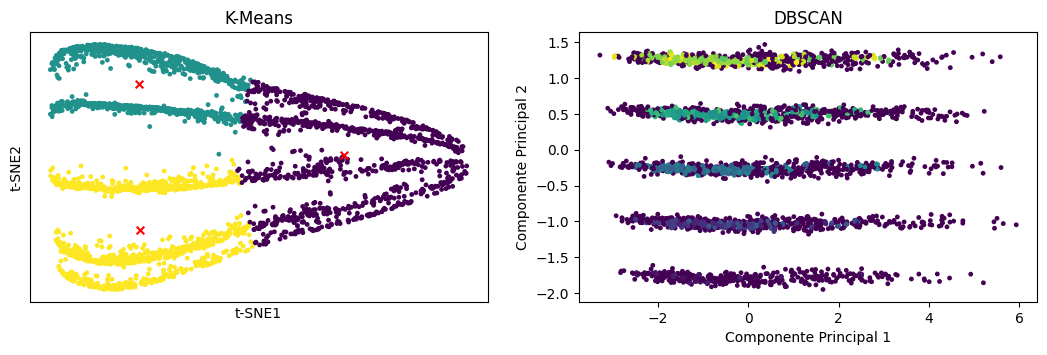

In [ ]:
#@title **check your answer**
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://drive.google.com/uc?id=1W7u4NBEQFmKNc726OSM2HU9n9t2dD4DK")

tsne1, tsne2, kmcs, centroids, pca1, pca2, dbcs = function_t07_3_img_seg_20242(df)

plt.figure(figsize=(13,3.5))
plt.subplot(1,2,1)
plt.title("K-Means")
plt.scatter(tsne1, tsne2, c=kmcs, s=6)
plt.scatter(centroids[:,0], centroids[:,1], c='red', marker='x', s=30)
plt.xticks([])
plt.yticks([])
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")

plt.subplot(1,2,2)
plt.title("DBSCAN")
plt.scatter(pca1, pca2, c=dbcs, s=6)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

In [ ]:
#@title **send your answer**
student_func_str = inspect.getsource(function_t07_3_img_seg_20242)
r = check_solution_and_evaluate(assignment_id, student_func_str)

Score
	5
Message
	Well done. You got the highest score.
